**Created by "Harianto .T"** At 24 Feb 2024 03:00 AM

Dataset Link : https://drive.google.com/file/d/1nQkWLcw1uChq-RDiKHbGvILgZ3UXPMTk/view?usp=sharing

**Klasifikasi Produk Ekslusif**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks/RAKAMIN PERSONAL/learning/Homework Feature Extraction

/content/drive/My Drive/Colab Notebooks/RAKAMIN PERSONAL/learning/Homework Feature Extraction


In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, stats
from collections import Counter
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Package Information
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.25.2
pandas version :  1.5.3
seaborn version :  0.13.1


In [4]:
#Konstanta
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

#1. Load & Describe Data

**Load Data**

In [5]:
# Load datasets from CSV files
dataset_raw = pd.read_csv('Product_Exclusive_Classification.csv')
dataset_raw = dataset_raw.drop('id', axis=1) # Kolom id tidak relevan

**Datasets Information & Descriptive Statistic**

In [6]:
# Explore Sample data
dataset_raw.sample(5)

,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
3700,TOM FORD,Blush,4.5,41.0,17400.0,63.0,63.0,0
4311,Dior,Face Brushes,3.5,40.0,3800.0,49.5,49.5,0
6565,Algenist,Moisturizers,3.5,21.0,1100.0,40.0,40.0,1
2363,Origins,Moisturizers,4.5,33.0,5000.0,62.0,62.0,0
3099,SEPHORA COLLECTION,Eye Brushes,4.5,132.0,47800.0,40.0,79.0,1


In [7]:
# Info
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              8000 non-null   object 
 1   category           7987 non-null   object 
 2   rating             7905 non-null   float64
 3   number_of_reviews  7991 non-null   float64
 4   love               7966 non-null   float64
 5   price              7992 non-null   float64
 6   value_price        7983 non-null   float64
 7   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 500.1+ KB


**Informasi Awal Dataset:**

  1. Berdasarkan Eksplorasi data awal tipe data pada rating bisa dirubah menjadi kategorikal, value_price dan price mengindikasikan kesamaan pada nilai nya sehingga salah satunya harus dihapus.
  2. Feature yang memiliki missing value yaitu category, rating, number_of_reviews, love, price, dan value_price.
  3. terdapat feature yang memiliki nilai mean lebih tinggi dari median sehingga distribusi datanya menjadi codong ke kanan (positif) yaitu (number_of_reviews, love, price, value_price) selain itu terdapat feature yang berpotensi outlier karena nilai standar deviasi yang tinggi dan nilai maksimum yang jauh lebih tinggi dari kuartil ketiga yaitu (number_of_reviews, love, price, and value price)

In [8]:
# Statistik Deskriptif
dataset_raw.describe()

,rating,number_of_reviews,love,price,value_price,exclusive
count,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


**Analisa berdasarkan informasi Diatas**

Terdapat feature yang memiliki nilai mean lebih tinggi daripada median, berpotensi membuat distribusi datanya condong ke kanan (positif).
1. number_of_reviews: Mean: 303.58, Median: 56.00
2. love: Mean: 17563.96, Median: 5500.00
3. price: Mean: 49.90, Median: 35.00
4. value_price: Mean: 50.98, Median: 35.00

Feature yang mungkin terdapat outlier berdasarkan informasi diatas:

**number_of_reviews, love, price & value price** analisa dilakukan dengan melihat nilai **standar deviasi yang tinggi dan nilai maksimum yang jauh lebih tinggi dari kuartil ketiga**

In [9]:
# Memisahkan feature berdasarkan jenis
numerical_column    = ['number_of_reviews','love','price','value_price']
categorical_column  = ['rating', 'brand', 'category', 'exclusive']

In [10]:
dataset_raw['rating'] = dataset_raw['rating'].astype('category')
dataset_raw['exclusive'] = dataset_raw['exclusive'].astype('category')
dataset_raw[categorical_column].describe()

,rating,brand,category,exclusive
count,7905.0,8000,7987,8000
unique,10.0,310,142,2
top,4.5,SEPHORA COLLECTION,Perfume,0
freq,3127.0,492,619,5953


**Analias berdasarkan informasi statistik feature pada fitur tipe kategorikal**

Ada total 310 merek yang berbeda, 142 kategori produk yang berbeda, dan 10 rating berbeda dalam dataset. Merk yang paling sering muncul adalah "SEPHORA COLLECTION" dengan 492 data, kategori produk yang paling umum adalah "Perfume" dengan 619 data, Rating yang paling sering diberikan users adalah 4.5, Lebih banyak produk dengan kategori tidak ekslusif dibandingkan ekslusif ini berpotensi data menjadi imbalance.

#2. Exploratory Data Analysis (EDA)

**1. Distribusi Data**

Pada analisa yang sebelumnya kita lakukan beberapa feature pada dataset berpotensi memiliki distribusi yang tidak normal (skew) mari kita coba menampilkan grafik untuk membuktikanya.

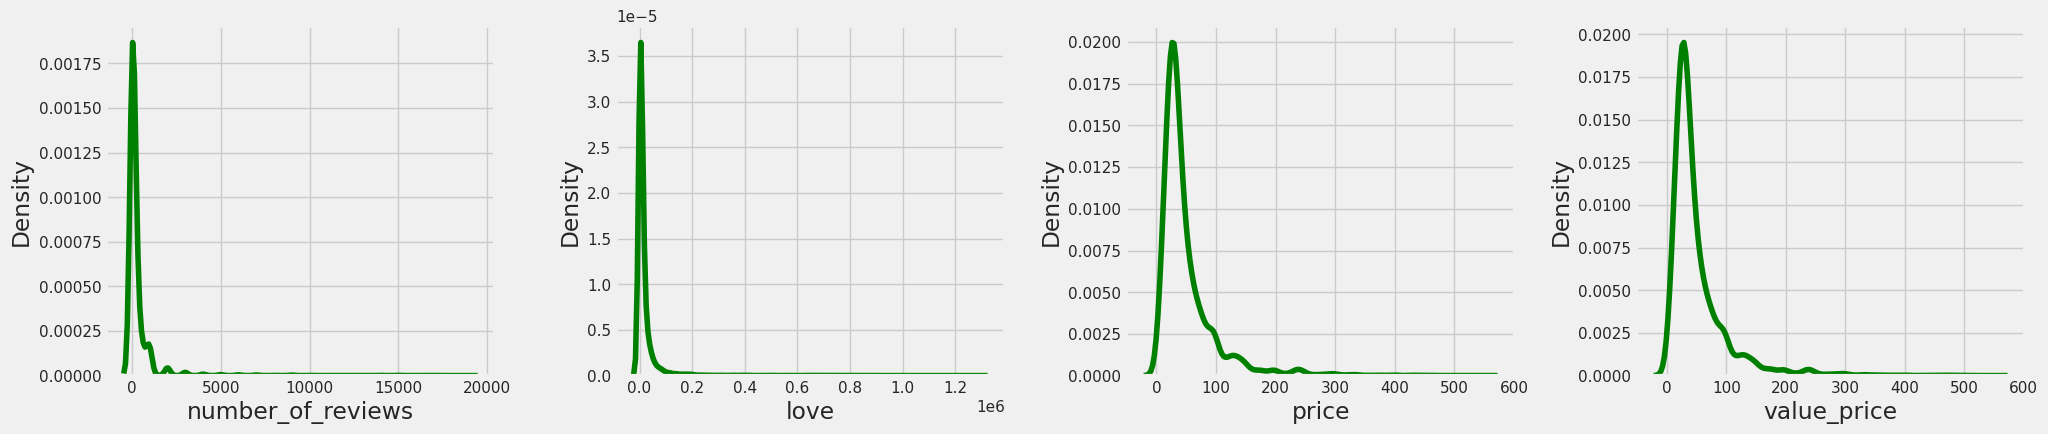

In [11]:
# Menampilkan distribusi data dengan KDE Plot
def print_kde(selected_dataset, features):
  for i in range(0, len(features)):
      plt.subplot(2, 4, i+1) # 2x4=8> len(numericals)=7
      sns.kdeplot(x=selected_dataset[features[i]], color='green')
      plt.xlabel(features[i])
      plt.tight_layout()

print_kde(dataset_raw,numerical_column)


**Analisa Distribusi setiap feature berdasarkan Grafik diatas**

Mayoritas data terkonsentrasi di sisi kanan dari nilai nol (Positif)

1.   **Rating** distribusi terkonsentrasi pada sisi kanan, terdapat dua puncak kurva namun tidak sejajar. Akan lebih jelas apabila dicari tahu nilai skweness dan kurtosis nya

Mayoritas data terkonsentrasi di sisi kiri dari nilai nol (Negatif)

1. **number_of_reviews** data terkonsentrasi di sisi kiri dari nilai nol
2. **love** data terkonsentrasi di sisi kiri dari nilai nol
3. **Price** terkonsentrasi di sisi kiri dari nilai nol
4. **Value** Price terkonsentrasi di sisi kiri dari nilai nol
5. **Exclusive** terkonsentrasi di sisi kiri dari nilai nol, terdapat dua bukit namun tidak sejajar mengindikasikan distribusi ini bukan bimodal


Terdapat dua puncak atau "bukit" pada grafik distribusi (Bimodal)
**Tidak Ada**

**2. Outlier**

Terdapat outlier pada beberapa feature sehingga Distribusi tidak merata (detail ada di bawah) kami akan melakukan preprocessing untuk mengatasi masalah tersebut dengna berbagai teknik seperti normalisasi, transformasi, penghapusan outlier atau dengan memilih model yang tidak terpengaruh dengan data outlier

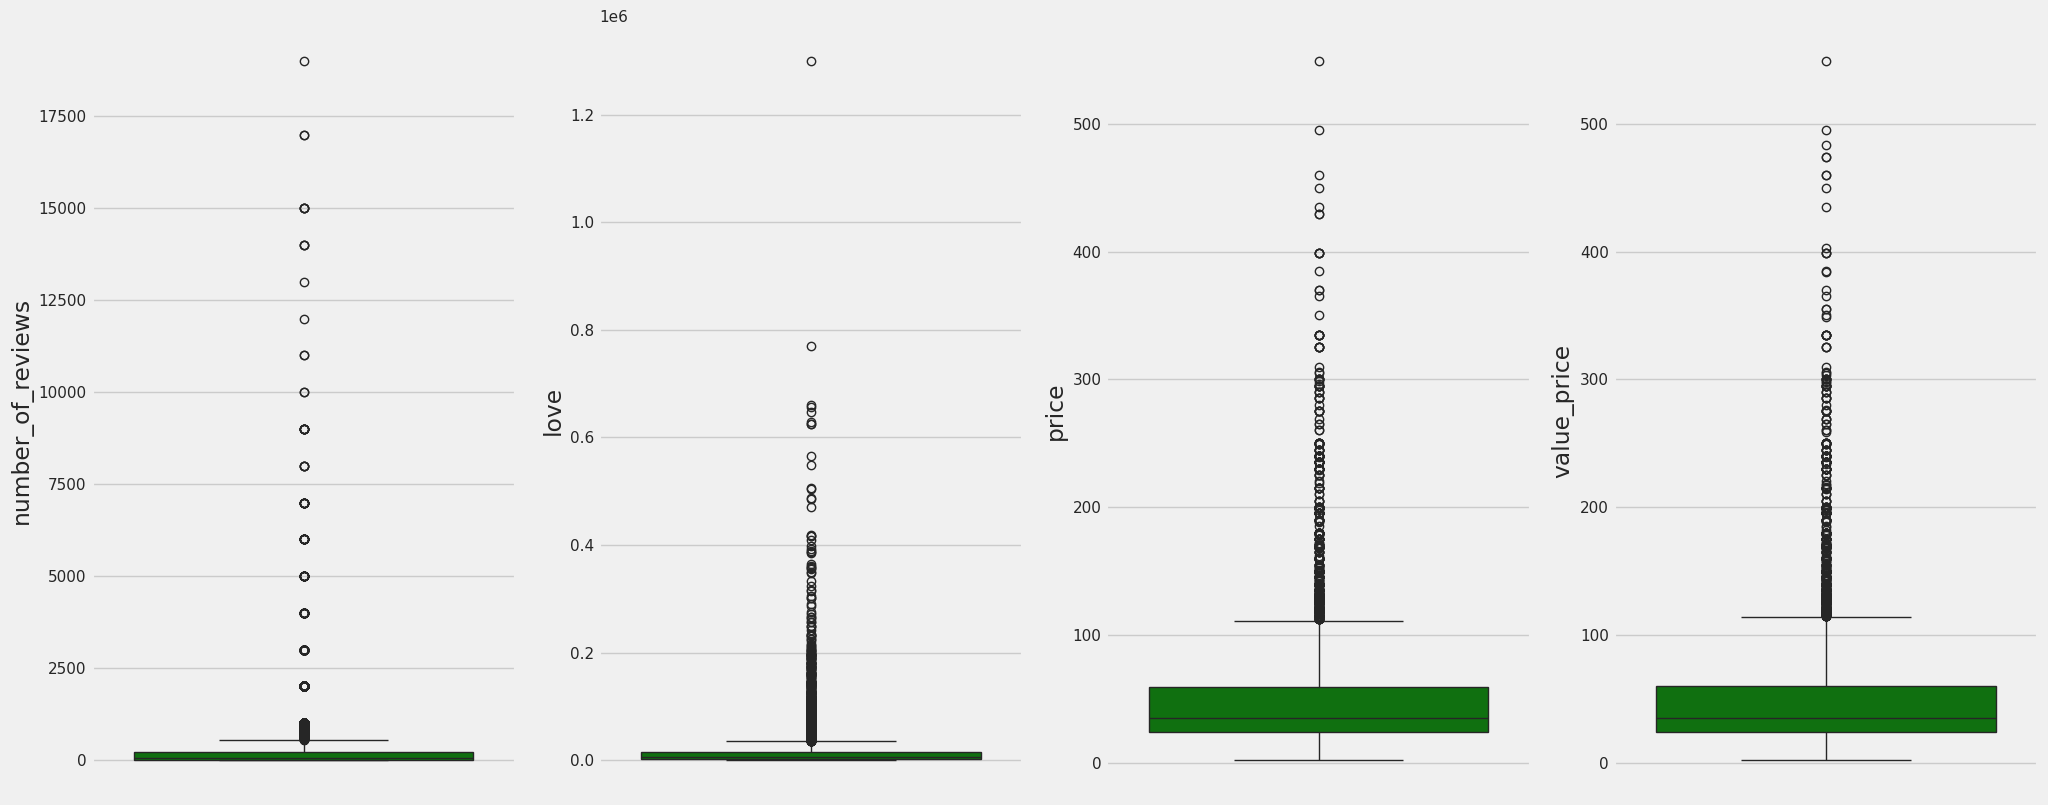

In [12]:
#Individuals Boxplot
def print_boxplot(selected_dataset, features):
  for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y= selected_dataset[features[i]], color='green', orient='v')
    plt.tight_layout()

print_boxplot(dataset_raw, numerical_column)


Dari Boxplot diatas terlihat jelas bahwa Distribusi tidak merata dan terdapat outlier pada seluruh feature numerik kecuali "exclusive"

#3. Multivariate Analysis
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:

1. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan? **fitur yang paling relevan dan harus dipertahankan adalah value_price, karena memiliki korelasi yang paling tinggi dengan label (category_label), meskipun masih tergolong rendah. Namun, penting untuk dicatat bahwa semua korelasi cukup rendah, sehingga tidak ada fitur yang memiliki hubungan yang signifikan dengan label.**
2. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu? **mempertimbangkan untuk menghilangkan salah satu dari dua fitur yang redundan, yaitu Price atau Value_price. Selain itu, hubungan antara Love dan Number_of_reviews bisa dieksplorasi lebih lanjut untuk memahami faktor apa yang memengaruhi tingkat kepuasan dan jumlah ulasan pelanggan**

In [13]:
#Korelasi Data Dengan Heatmap
label_encoder                     = LabelEncoder()
dataset_processed                 = dataset_raw[['brand','category','rating','number_of_reviews','love','price','value_price','exclusive']]
dataset_processed['exclusive']    = dataset_processed['exclusive'].astype(int) #merubah tipe kategorikal ke integer agar dapat diproses oleh heatmap
dataset_processed['rating']       = dataset_processed['rating'].astype(float) #merubah tipe data ke default agar dapat diproses oleh heatmap
dataset_processed['brand']        = label_encoder.fit_transform(dataset_processed['brand']) #Melakukan encoding pada brand agar dapat ditampilkan di heathap

coor                              = dataset_processed.corr(method='spearman') #metode spearman cocok digunakan ketika data memiliki outlier
coor

,brand,rating,number_of_reviews,love,price,value_price,exclusive
brand,1.000000,-0.025380,-0.024456,0.004912,-0.133762,-0.126973,0.131529
rating,-0.025380,1.000000,0.068883,0.072861,0.117896,0.118582,-0.012329
number_of_reviews,-0.024456,0.068883,1.000000,0.837748,-0.112101,-0.125739,0.033147
love,0.004912,0.072861,0.837748,1.000000,-0.145604,-0.145031,0.100567
price,-0.133762,0.117896,-0.112101,-0.145604,1.000000,0.991349,-0.230301
value_price,-0.126973,0.118582,-0.125739,-0.145031,0.991349,1.000000,-0.217787
exclusive,0.131529,-0.012329,0.033147,0.100567,-0.230301,-0.217787,1.000000


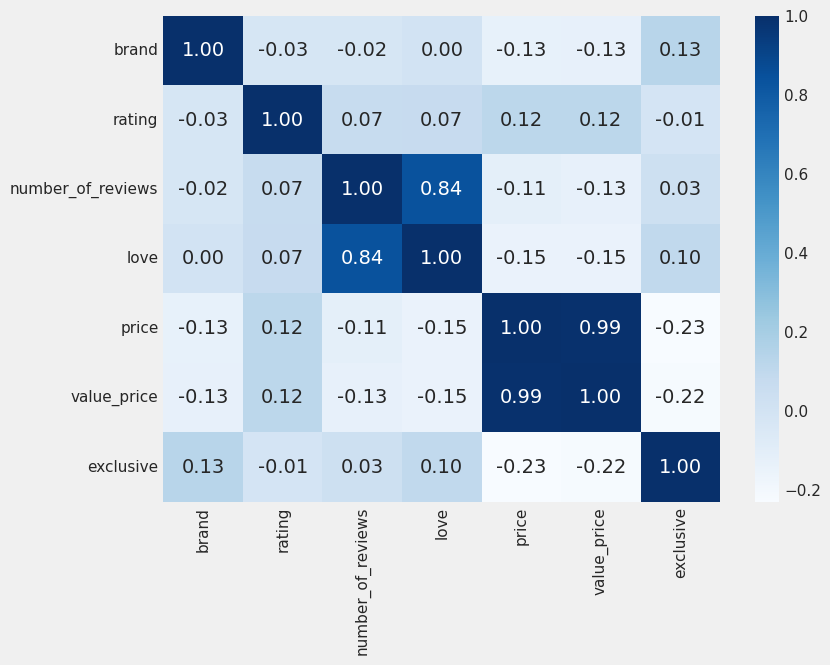

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(coor, cmap="Blues", annot=True, fmt='.2f')
plt.show()

**Feature yang Paling Relevan:**

Brand memiliki korelasi positif tertinggi. Hal ini menunjukkan adanya hubungan yang relatif kuat antara merek dengan eksklusivitas produk. Artinya merek tertentu cenderung lebih eksklusif daripada yang lain.

**Feature yang Harus Dihilangkan:**

Feature Price dan Value Price memiliki korelasi sangat tinggi, artinya salah satunya harus dihilangkan untuk menghindari multicollinearity dalam analisis regresi atau model-machine learning.

**Feature yang Penting dalam Prediksi Barang Eksklusif:**

Fitur yang memiliki korelasi positif untuk memprediksi produk exclusive
Selain 'brand', fitur 'price', juga memiliki korelasi yang cukup tinggi dengan 'exclusive' (masing-masing sekitar -0.230301), ini menunjukkan bahwa harga dan nilai harga produk dapat menjadi faktor penting dalam menentukan apakah produk akan dianggap eksklusif atau tidak.

#4. Data Cleansing

**1. Handle Missing Value**

In [15]:
def info_missing_value(data):
  total = data.isnull().sum().sort_values(ascending=False)
  percent = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  missing_data = missing_data[missing_data['Total'] > 0]
  return missing_data


data  = info_missing_value(dataset_processed)
data

,Total,Percent
rating,95,1.1875
love,34,0.4250
value_price,17,0.2125
category,13,0.1625
number_of_reviews,9,0.1125
price,8,0.1000


In [16]:
#Missing Value tidak tampil = sudah terhapus
dataset_processed = dataset_processed.dropna(subset=['rating', 'love', 'value_price', 'category', 'number_of_reviews', 'price'])
data  = info_missing_value(dataset_processed)
data

,Total,Percent


Ditemukan missing value namun jumlah nya tidak signifikan dengan persentase di bawah 5% dari total record sehingga kami menggunakan teknik penghapusan untuk menghapus record yang memiliki missing value

**2. Handle Duplicate Data**

In [17]:
# Declare Function
def check_duplicate(data):
  if(data.duplicated().sum() > 0):
    print("Ditemukan data duplicate sebesar :", data.duplicated().sum())
  else:
    print("Tidak ditemukan data duplicate")

# Run Function
check_duplicate(dataset_processed)

Ditemukan data duplicate sebesar : 6


In [18]:
# Penghapusan dengan asumsi mempertahankan record terakhir
dataset_processed = dataset_processed.drop_duplicates()

In [19]:
# Cek ulang dataset setelah dihapus
check_duplicate(dataset_processed)

Tidak ditemukan data duplicate


**3. Handle Outliers**

In [26]:
# Fungsi untuk mendeteksi outlier menggunakan teknik IQR
def outlier_handler(df, col):

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr

    outlier = df[col][(df[col] < low_bound) | (df[col] > up_bound)]

    print(f'Percentage of outliers: {len(outlier)*100/len(df[col]):.2f}%')

    no_outlier = df[(df[col] >= low_bound) & (df[col] <= up_bound)]

    return no_outlier

    return transformed_feature

def print_hisplot(selected_dataset, features):
  for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.histplot(x= selected_dataset[features[i]], color='green')
    plt.tight_layout()

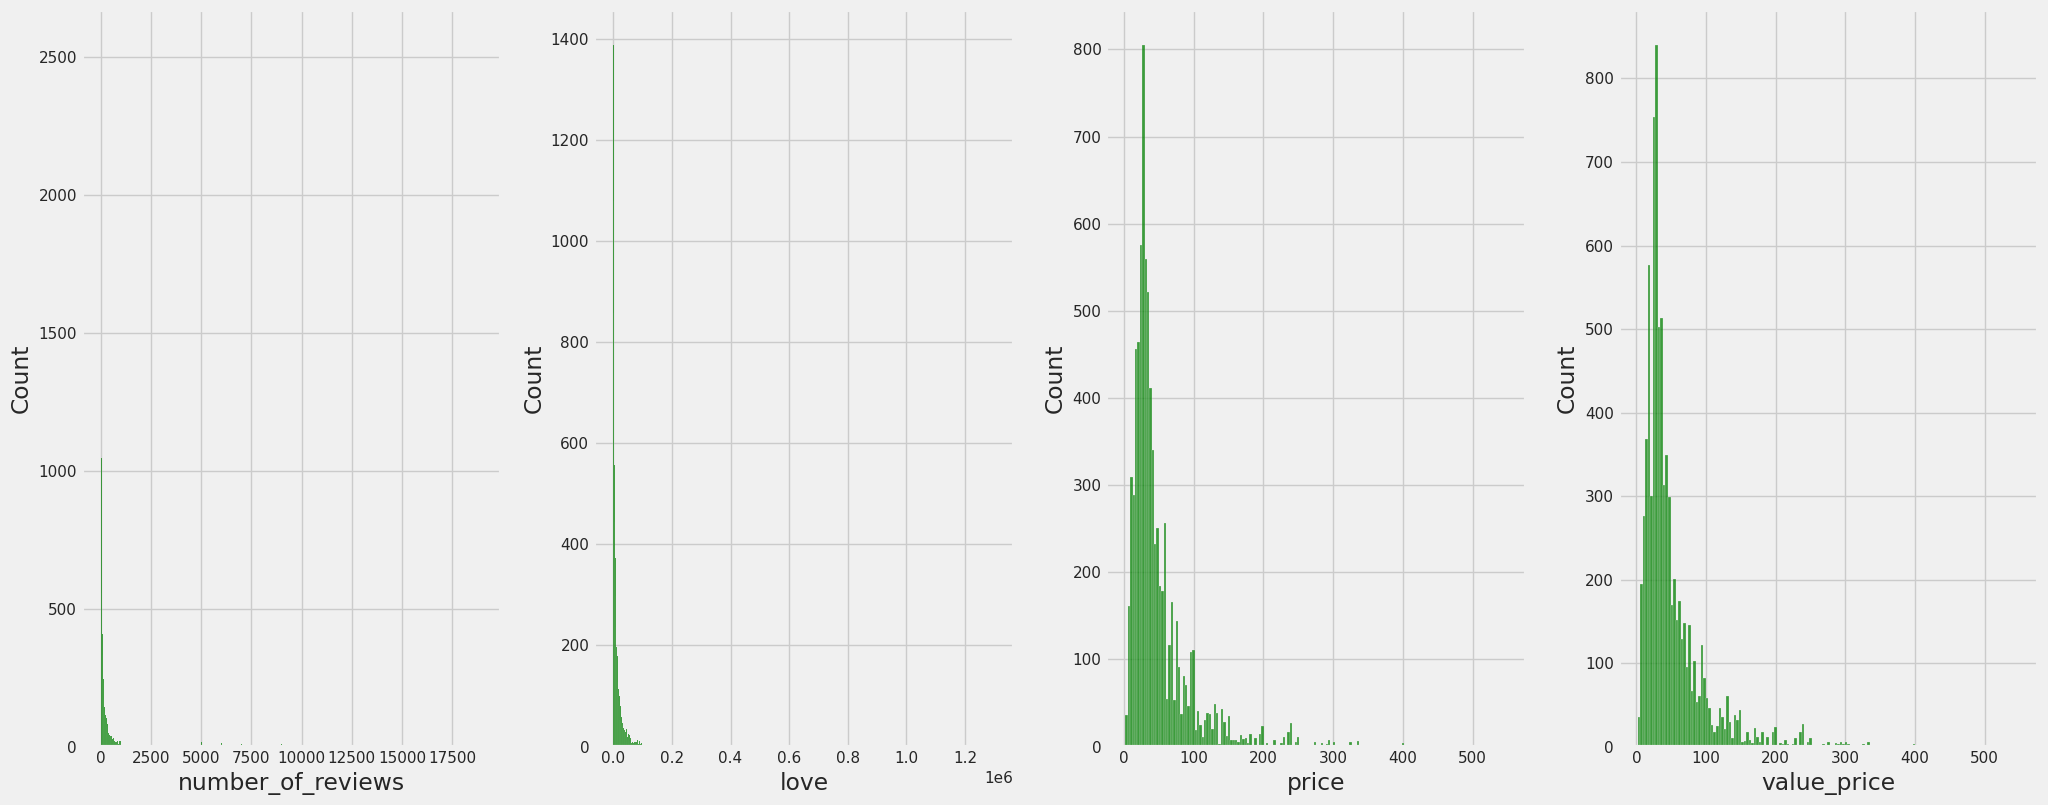

In [27]:
#Cek outlier dengan hisplot
print_hisplot(dataset_processed, ['number_of_reviews','love','price','value_price'])

In [35]:
#Menghapus outlier pada feature dengan distribusi skew
for i in ['number_of_reviews','love','price','value_price']:
  dataset_processed[i] = np.log(dataset_processed[i] + (dataset_processed[dataset_processed[i] > 0][i].min() / 2))

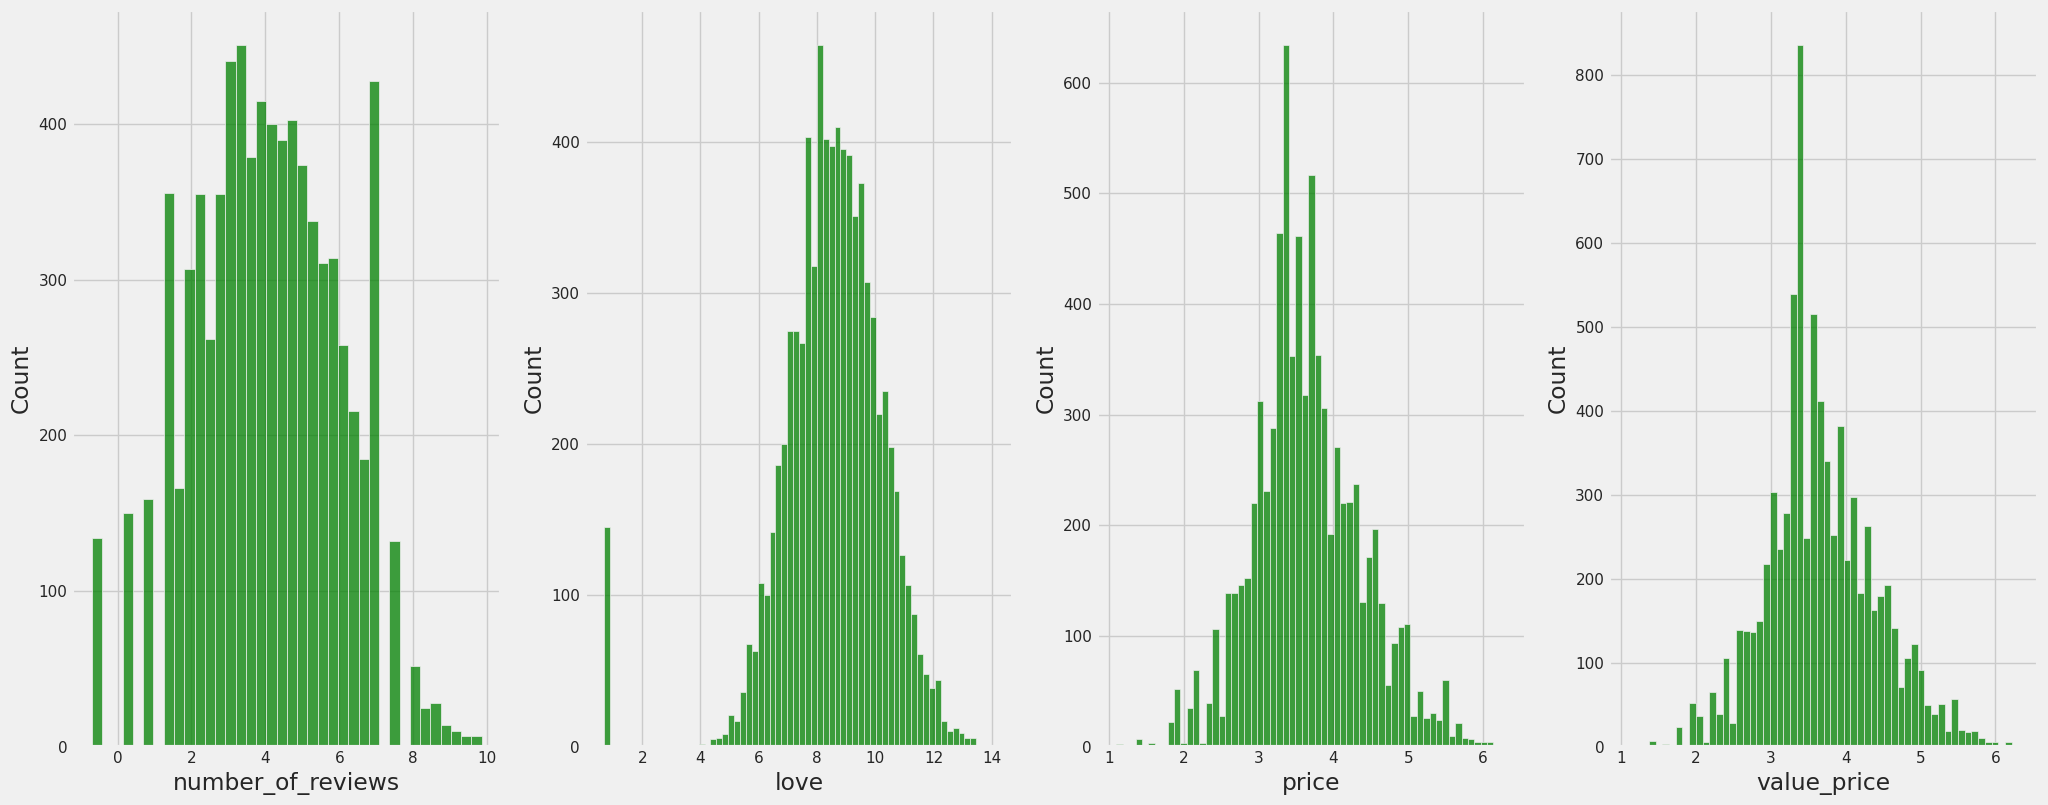

In [36]:
#Cek Ulang outlier dengan hisplot
print_hisplot(dataset_processed, ['number_of_reviews','love','price','value_price'])

In [38]:
#Menghapus Outlier pada distribusi Normal
from scipy import stats

print("Before removing outlier: ", len(dataset_processed))

for num in ['number_of_reviews','love','price','value_price']:
  z_scores = np.abs(stats.zscore(dataset_processed[num]))
  dataset_processed = dataset_processed[z_scores <= 3]

print("After removing outlier: ", len(dataset_processed))

Before removing outlier:  7822
After removing outlier:  7640


**4. Feature Engineering**

In [39]:
# Encoding Feature brand dan category
dataset_ready             = dataset_processed
dataset_ready['brand']    = label_encoder.fit_transform(dataset_ready['brand'])
dataset_ready['category'] = label_encoder.fit_transform(dataset_ready['category'])
dataset_ready

,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
5,99,119,4.5,4.548600,8.007034,4.369448,4.369448,0
6,20,28,5.0,3.449988,8.102284,4.553877,4.553877,0
7,287,119,4.5,5.102911,8.343316,4.143135,4.143135,0
8,41,119,4.5,4.848116,7.973155,4.465908,4.465908,0
9,83,119,5.0,3.020425,7.697121,4.454347,4.454347,0
...,...,...,...,...,...,...,...,...
7995,270,23,0.0,-0.693147,5.278115,4.454347,4.454347,0
7996,253,103,4.0,3.417727,9.425613,4.025352,4.025352,0
7997,88,99,4.5,3.113515,9.465138,3.401197,3.555348,1
7998,307,111,4.5,1.704748,7.784057,2.564949,2.564949,0


In [40]:
#Scaling Feature number_of_reviews, love, price, value_price,
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for i in ['number_of_reviews','love','price','value_price']:
  print("Scaling feature ", i)
  dataset_ready[i] = scaler.fit_transform(pd.DataFrame(dataset_ready[i]))
  print("")

Scaling feature  number_of_reviews

Scaling feature  love

Scaling feature  price

Scaling feature  value_price



**5. Feature Preparation**

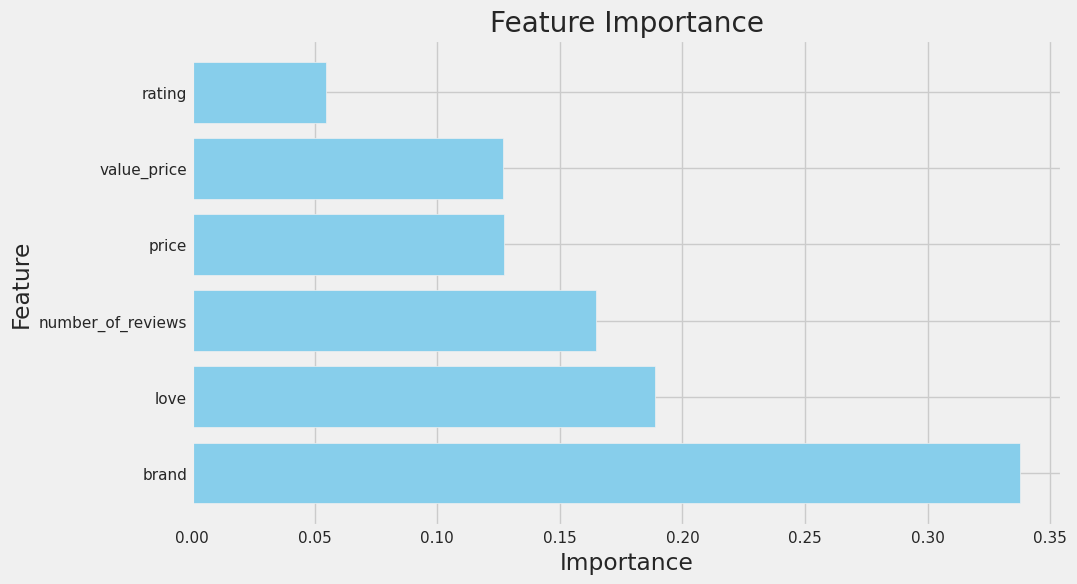

In [41]:
#Mencari Feature Importance
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

X = dataset_ready[['rating','number_of_reviews','love','price','value_price','brand']]
y = dataset_ready[['exclusive']]

rf_model.fit(X, y)
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Feature yang akan diuji coba:
1. Dengan semua Feature
2. Sebagian Feature yaitu (brand, love, number_of_reviews, price)

**6. Cek Target Class Imbalance**

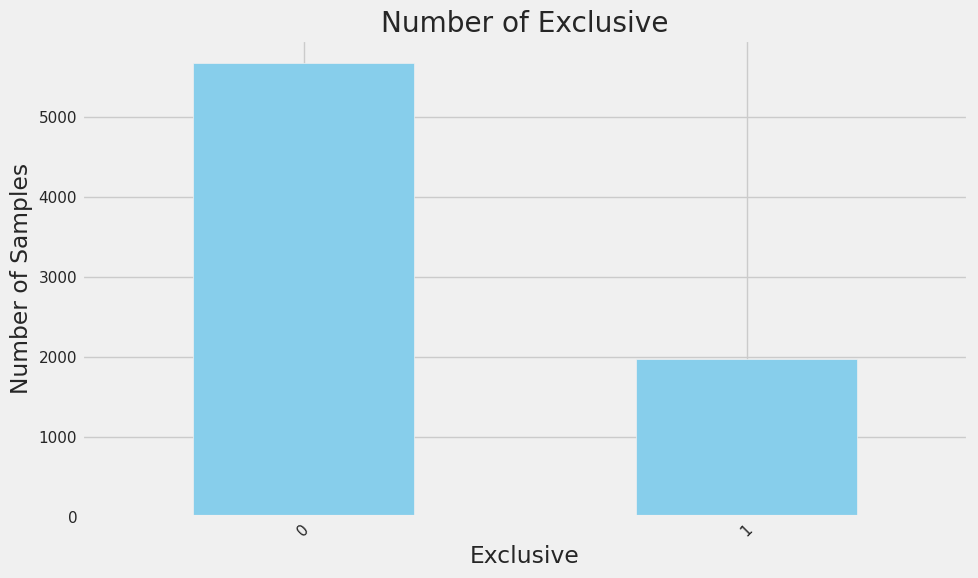

In [42]:
#Apakah Produk Exclusive memili kelas yang tidak seimbang?
class_counts = dataset_ready['exclusive'].value_counts()

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Exclusive')
plt.ylabel('Number of Samples')
plt.title('Number of Exclusive')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Terlihat jelas bahwa kelas 0 mayoritas dan kelas 1 minoritas artinya banyak produk bukan kategori Condisioner

#5. Modeling

**Pengujian Machine Learning Menggunakan Beberapa Model**

In [43]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


models = {
    'SVM': (SVC(), {'kernel': 'rbf'}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': 5}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': 100}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': 5}),
    'Logistic Regression': (LogisticRegression(), {'C': 1.0, 'solver': 'liblinear'})
}

def pengujian_ml(title, kf, X, y):
  print("Pengujian dengan Feature : ", title)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  scoring = {
      'accuracy': make_scorer(accuracy_score),
      'precision': make_scorer(precision_score),
      'recall': make_scorer(recall_score),
      'f1_score': make_scorer(f1_score)
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
  for name, (model, params) in models.items():
      model_cv = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
      results['Model'].append(name)
      results['Accuracy'].append(np.mean(model_cv))
      results['Precision'].append(np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision')))
      results['Recall'].append(np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall')))
      results['F1-Score'].append(np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')))

  results_df = pd.DataFrame(results)

  print("Hasil Evaluasi Cross-Validation:")
  print(results_df)

  best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
  best_model = models[best_model_name][0]
  best_model_params = models[best_model_name][1]
  best_model.fit(X_train, y_train)
  y_pred_test = best_model.predict(X_test)

  accuracy_test = accuracy_score(y_test, y_pred_test)
  precision_test = precision_score(y_test, y_pred_test)
  recall_test = recall_score(y_test, y_pred_test)
  f1_test = f1_score(y_test, y_pred_test)

  print("\nHasil Evaluasi pada Data Testing (Model Terbaik: {})".format(best_model_name))
  print("Accuracy:", accuracy_test)
  print("Precision:", precision_test)
  print("Recall:", recall_test)
  print("F1-Score:", f1_test)

def pengujian_ml_smote(title, kf, X, y):
  print("Pengujian dengan Feature : ", title)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  sm = SMOTE(random_state=0)
  enn = EditedNearestNeighbours()
  smote_enn = SMOTEENN(sampling_strategy='auto', random_state=0, smote=sm, enn=enn, n_jobs=4)
  X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

  results_resampled = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
  for name, (model, params) in models.items():
      model_cv = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
      results_resampled['Model'].append(name)
      results_resampled['Accuracy'].append(np.mean(model_cv))
      results_resampled['Precision'].append(np.mean(cross_val_score(model, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')))
      results_resampled['Recall'].append(np.mean(cross_val_score(model, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')))
      results_resampled['F1-Score'].append(np.mean(cross_val_score(model, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')))

  results_resampled_df = pd.DataFrame(results_resampled)

  print("Hasil Evaluasi Cross-Validation setelah SMOTE:")
  print(results_resampled_df)

  best_model_name_resampled = results_resampled_df.loc[results_resampled_df['Accuracy'].idxmax(), 'Model']
  best_model_resampled = models[best_model_name_resampled][0]
  best_model_params_resampled = models[best_model_name_resampled][1]
  best_model_resampled.fit(X_train_resampled, y_train_resampled)
  y_pred_test_resampled = best_model_resampled.predict(X_test)

  accuracy_test_resampled = accuracy_score(y_test, y_pred_test_resampled)
  precision_test_resampled = precision_score(y_test, y_pred_test_resampled)
  recall_test_resampled = recall_score(y_test, y_pred_test_resampled)
  f1_test_resampled = f1_score(y_test, y_pred_test_resampled)

  print("\nHasil Evaluasi pada Data Testing setelah Resampling (Model Terbaik: {})".format(best_model_name_resampled))
  print("Accuracy:", accuracy_test_resampled)
  print("Precision:", precision_test_resampled)
  print("Recall:", recall_test_resampled)
  print("F1-Score:", f1_test_resampled)

In [44]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

#SEMUA FEATURE
X = dataset_ready[['rating','number_of_reviews','love','price','value_price','brand']]
y = dataset_ready[['exclusive']]

In [45]:
pengujian_ml("All", kf, dataset_ready[['rating','number_of_reviews','love','price','value_price','brand']], dataset_ready[['exclusive']])

Pengujian dengan Feature :  All
Hasil Evaluasi Cross-Validation:
                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.739037   0.000000  0.000000  0.000000
1                  KNN  0.890055   0.837974  0.715026  0.771354
2        Random Forest  0.826732   0.803586  0.456671  0.583664
3        Decision Tree  0.818055   0.651114  0.644541  0.648229
4  Logistic Regression  0.744599   0.562560  0.102452  0.172227

Hasil Evaluasi pada Data Testing (Model Terbaik: KNN)
Accuracy: 0.8848167539267016
Precision: 0.8092307692307692
Recall: 0.6976127320954907
F1-Score: 0.7492877492877492


In [46]:
pengujian_ml_smote("All", kf, X, y)

Pengujian dengan Feature :  All
Hasil Evaluasi Cross-Validation setelah SMOTE:
                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.617433   0.578449  0.573626  0.575520
1                  KNN  0.940315   0.905921  0.968330  0.935975
2        Random Forest  0.911017   0.924497  0.873424  0.899861
3        Decision Tree  0.889952   0.868201  0.889477  0.879024
4  Logistic Regression  0.652663   0.631576  0.563924  0.594767

Hasil Evaluasi pada Data Testing setelah Resampling (Model Terbaik: KNN)
Accuracy: 0.868455497382199
Precision: 0.7315789473684211
Recall: 0.7374005305039788
F1-Score: 0.7344782034346105


In [47]:
#SEBAGIAN FEATURE
X = dataset_ready[['brand', 'love', 'number_of_reviews', 'price']]
y = dataset_ready[['exclusive']]

In [48]:
pengujian_ml("Sebagian", kf, X, y)

Pengujian dengan Feature :  Sebagian
Hasil Evaluasi Cross-Validation:
                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.739037   0.000000  0.000000  0.000000
1                  KNN  0.894636   0.835505  0.739144  0.784111
2        Random Forest  0.845384   0.822791  0.524436  0.639184
3        Decision Tree  0.817404   0.653703  0.654119  0.648038
4  Logistic Regression  0.745744   0.574789  0.097376  0.165356

Hasil Evaluasi pada Data Testing (Model Terbaik: KNN)
Accuracy: 0.8959424083769634
Precision: 0.8471337579617835
Recall: 0.7055702917771883
F1-Score: 0.7698986975397973


In [49]:
pengujian_ml_smote("Sebagian", kf, X, y)

Pengujian dengan Feature :  Sebagian
Hasil Evaluasi Cross-Validation setelah SMOTE:
                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM  0.617762   0.577132  0.567892  0.571950
1                  KNN  0.946350   0.913281  0.973060  0.942143
2        Random Forest  0.933698   0.930560  0.921314  0.923823
3        Decision Tree  0.902555   0.880024  0.904806  0.890886
4  Logistic Regression  0.654988   0.632149  0.563046  0.594791

Hasil Evaluasi pada Data Testing setelah Resampling (Model Terbaik: KNN)
Accuracy: 0.8854712041884817
Precision: 0.7853107344632768
Recall: 0.7374005305039788
F1-Score: 0.7606019151846786


**Conclusion**

The dataset has 8 features, with 8000 records, two object columns, and five numerical column
Six features have missing values and should be handled before building machine learning modeling
number_of_reviews, love, price & value price has a high standard deviation value & maximum value is higher than Quantile 3.

Missing values on each feature will be removed using 'dropna' function, found 6 duplicated values will be removed, and kept the last one. Each feature has a positive skew distribution as seen on the histogram plot, it will be transformed using nplog.

Categorical features (brand and category) will be converted into numeric with "label encoder".
Find feature importance (features that have a good correlation with exclusive labels)
Perform modeling using all features and some features to compare model performance.

Splitting training and testing data and implementing SMOTE to find out the effect of class imbalance on the model and possible model performance.

**Export to HTML**

In [ ]:
# #@title Convert ipynb to HTML in Colab
# # Upload ipynb
# from google.colab import files
# f = files.upload()

# # Convert ipynb to html
# import subprocess
# file0 = list(f.keys())[0]
# _ = subprocess.run(["pip", "install", "nbconvert"])
# _ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# # download the html
# files.download(file0[:-5]+"html")